In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
data = pd.read_csv('./data/rotten_tomatoes_20200726.csv', 
                            index_col=0,header=0, 
                            encoding = "utf8")
data.head(2)

,text,Action and Adventure,Animation,Art House and International,Comedy,Drama,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,fresh,rotten,Other
0,A distinctly gallows take on contemporary fina...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
1,It's an allegory in search of a meaning that n...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0


In [3]:
y_df = data.iloc[:, 1:]
cols = list(y_df.columns[:-3]) + [y_df.columns[-1]] + list(y_df.columns[-3:-1])
# cols
y_df = y_df[cols]
y_df.columns
y_df_new = y_df.iloc[:,:-2]
y_df_new.columns

Index(['Action and Adventure', 'Animation', 'Art House and International',
       'Comedy', 'Drama', 'Horror', 'Kids and Family',
       'Musical and Performing Arts', 'Mystery and Suspense', 'Romance',
       'Science Fiction and Fantasy', 'Other'],
      dtype='object')

In [4]:
tags = list(y_df_new.columns)
tags

['Action and Adventure',
 'Animation',
 'Art House and International',
 'Comedy',
 'Drama',
 'Horror',
 'Kids and Family',
 'Musical and Performing Arts',
 'Mystery and Suspense',
 'Romance',
 'Science Fiction and Fantasy',
 'Other']

In [5]:
Y = y_df_new.values
Y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.]])

In [6]:
num_tags = y_df_new.shape[1]
num_tags

12

# Load Processed Data

In [7]:
import pickle

file_path = './data/rt-processed-20200821.pickle'
with open(file_path, 'rb') as pickle_file:
    text_train = pickle.load(pickle_file)
    y_train = pickle.load(pickle_file)
    text_test = pickle.load(pickle_file)
    y_test = pickle.load(pickle_file)
    comedydramafresh = pickle.load(pickle_file)
    dramafresh = pickle.load(pickle_file)
    comedyfresh = pickle.load(pickle_file)
    comedydramarotten = pickle.load(pickle_file)
    dramarotten = pickle.load(pickle_file)
    comedyrotten = pickle.load(pickle_file)

In [8]:
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(Y, test_size=0.2, 
                                                    random_state=2020)
y_train.shape, y_test.shape

((39004, 12), (9751, 12))

In [9]:
# # pronouns = ['I', 'you', 'he', 'she', 'it', 'they', 'me', 'you', 'him', 'her', 'it',
#             'my', 'mine', 'your', 'yours', 'his', 'her', 'hers', 'its', 
#             'who', 'whom', 'whose', 'what', 'which', 
#             'another', 'each', 'everything', 'nobody', 'either', 'someone',
#             'who', 'whom', 'whose', 'that', 'which', 'myself', 'yourself', 'himself', 'herself', 'itself',
#             'this', 'that', 'these', 'those']

In [10]:
type(text_test[0])

str

In [11]:
review_text = pd.concat([text_train,text_test])

In [12]:
review_text[5]

'person person express someth new necessari book say limit gap known us gpe distant-futur person date financ golden boy dream live civil ahead watch dark-shadow cast firmament fac uncontested-k chauffeur midtown-gp get haircut father old-barb anxious-ey glu'

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_text)

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-pack

In [14]:
VOCAB_SIZE = len(tokenizer.word_index) + 1 #19793
EMBED_DIM = 100
#MAX_LENGTH = review_text.apply(len).max()

In [15]:
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

# X_train_pad = pad_sequences(X_train, maxlen=75, padding = 'post')
# X_test_pad = pad_sequences(X_test, maxlen=75, padding = 'post')

# X_train_pad.shape, X_test_pad.shape

In [16]:
# exp_test = tokenizer.texts_to_sequences(comedydramafresh)
# exp_test_pad = pad_sequences(exp_test, maxlen=MAX_LENGTH, padding = 'post')
# exp_test_pad.shape

In [17]:
import os
import numpy as np

GLOVE_DIR = '../spam_2019/data/'

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [18]:
embedding_matrix = np.zeros((VOCAB_SIZE, EMBED_DIM))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [19]:
embedding_matrix.min()

-3.6791999340057373

In [20]:
embedding_matrix.max()

3.18149995803833

use ``exp`` to convert all values to be _positive_.

In [21]:
embedding_matrix_pos = np.exp(embedding_matrix)

embedding_matrix_pos.min()

0.025243162954504007

In [22]:
X_train[0]

[2531,
 85,
 62,
 3433,
 312,
 17,
 1274,
 190,
 2198,
 5629,
 141,
 43,
 6459,
 596,
 266,
 1666,
 2614,
 169,
 39]

In [23]:
def globe_emb(train_array, emb_dim=100):
    emb_matrix = []
    for x in train_array:
        embs = []
        embs += [embedding_matrix_pos[i] for i in x]
        embs = np.array(embs)
        X_train_emb0 = embs.mean(axis=0)
#         X_train_emb0 = np.sum(embs,axis=0)    
        emb_matrix.append(X_train_emb0)
    emb_matrix = np.array(emb_matrix)
    return emb_matrix

In [24]:
train_matrix = globe_emb(X_train)
test_matrix = globe_emb(X_test)

In [25]:
train_matrix.shape

(39004, 100)

In [26]:
train_matrix[0]

array([0.85712383, 1.20654609, 1.20428591, 0.92818219, 0.89999801,
       1.44551306, 0.91607342, 1.17232083, 1.05292019, 0.87997029,
       1.0294816 , 1.07853653, 1.11555511, 1.11018143, 1.16433064,
       1.06375986, 1.05211603, 1.18739304, 1.17294379, 1.24673332,
       1.16504366, 1.08910581, 0.91665905, 0.94936553, 1.30108463,
       1.19368934, 0.8890887 , 0.96957892, 1.3243831 , 0.89446606,
       1.05896045, 1.39412598, 1.05615232, 1.07145207, 1.06766401,
       1.06889534, 0.87069041, 1.07583694, 1.34153374, 0.86821645,
       0.97542944, 0.94609045, 0.98842685, 0.73749233, 0.84520331,
       1.09440793, 1.02953571, 1.07392923, 1.00860647, 0.72822753,
       1.1549101 , 0.97954637, 1.15904273, 1.94496693, 1.03693243,
       0.56036032, 1.11783045, 1.03132063, 2.75553718, 1.10467393,
       1.13184606, 1.89082312, 0.83505656, 1.04169029, 1.40869919,
       1.14088506, 1.37632517, 1.24727855, 0.929679  , 0.87788367,
       1.17045917, 1.00287905, 1.1781486 , 0.8985514 , 1.16037

In [27]:
assert train_matrix.shape[0] == len(X_train)
assert test_matrix.shape[0] == len(X_test)

In [28]:
train_matrix.shape, test_matrix.shape

((39004, 100), (9751, 100))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [30]:
model = Sequential()
#model.add(Input(shape=(100,)))
model.add(Dense(128, activation='relu', input_shape=(100,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_tags, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 12)                396       
Total params: 89,580
Trainable params: 89,580
Non-trainable params: 0


In [31]:
model.fit(train_matrix, y_train,
          batch_size=32,
          epochs=50,
          validation_split=0.1)

print('Eval loss/accuracy:{}'.format(model.evaluate(test_matrix, y_test, batch_size = 32)))

Train on 35103 samples, validate on 3901 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
35103/35103 [==============================] - 8s 214us/sample - loss: 0.3866 - acc: 0.8402 - val_loss: 0.3486 - val_acc: 0.8531
Epoch 2/50
35103/35103 [==============================] - 7s 204us/sample - loss: 0.3373 - acc: 0.8584 - val_loss: 0.3296 - val_acc: 0.8598
Epoch 3/50
35103/35103 [==============================] - 7s 193us/sample - loss: 0.3190 - acc: 0.8647 - val_loss: 0.3130 - val_acc: 0.8688
Epoch 4/50
35103/35103 [==============================] - 7s 195us/sample - loss: 0.3024 - acc: 0.8722 - val_loss: 0.2881 - val_acc: 0.8784
Epoch 5/50
35103/35103 [==============================] - 7s 197us/sample - loss: 0.2857 - acc: 0.8805 - val_loss: 0.2790 - val_acc: 0.8837
Epoch 6/50
35103/35103 [==============================] - 7s 198us/sample - loss: 0.2664 - acc: 0.8895 - val_loss: 0.2558 - val_acc: 0.9002
Epoch 7/50
35103/35103 [==============================] - 7s 19

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
Using TensorFlow backend.
keras is no longer supported, please use tf.keras instead.
You have provided over 5k background samples! For better performance consider using smaller random sample.


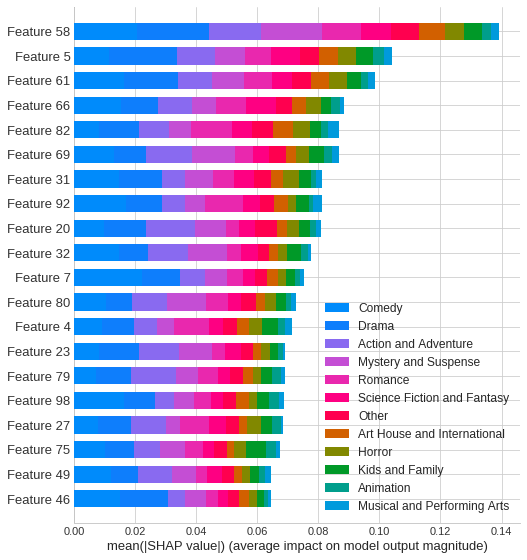

In [32]:
import shap

attrib_data = train_matrix[:15000]
explainer = shap.DeepExplainer(model, attrib_data)
num_explanations = 3000
shap_vals = explainer.shap_values(test_matrix[:num_explanations])

shap.summary_plot(shap_vals, class_names=tags)

In [33]:
type(shap_vals)

list

In [34]:
len(shap_vals)

12

In [35]:
len(shap_vals[0])

3000

In [36]:
len(shap_vals[0][0])

100

``shap_vals`` has a shape of $c \times m \times k$, in which:
- $c$ is the # of classes (e.g. `14`);
- $m$ is the # of test instances in SHAP (e.g. `200`);
- $k$ is the # of features (e.g. `100`).

Action and Adventure


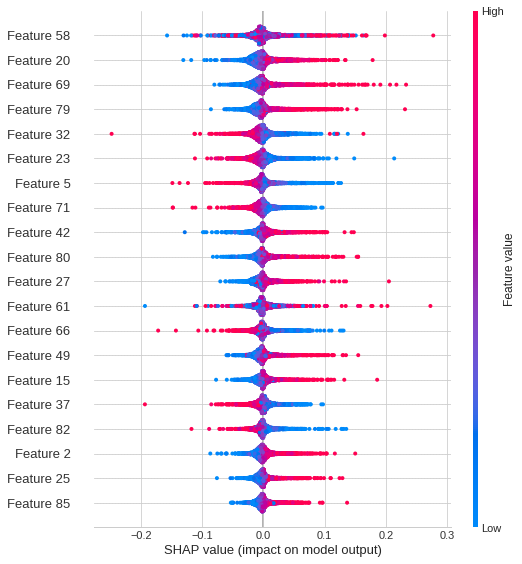

Animation


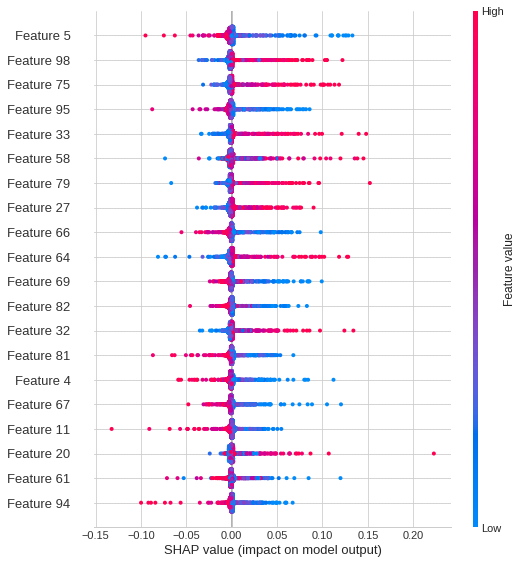

Art House and International


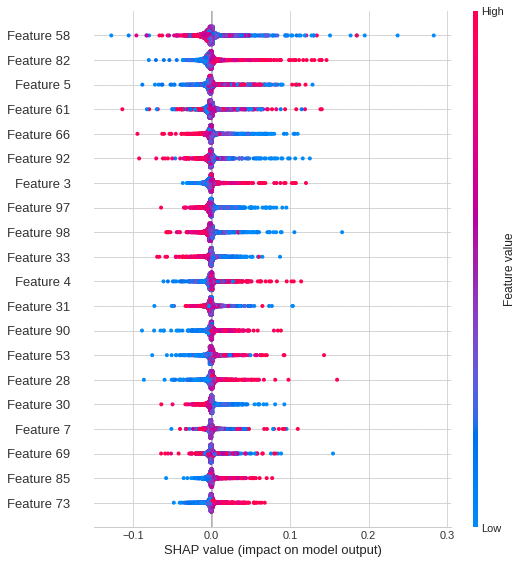

Comedy


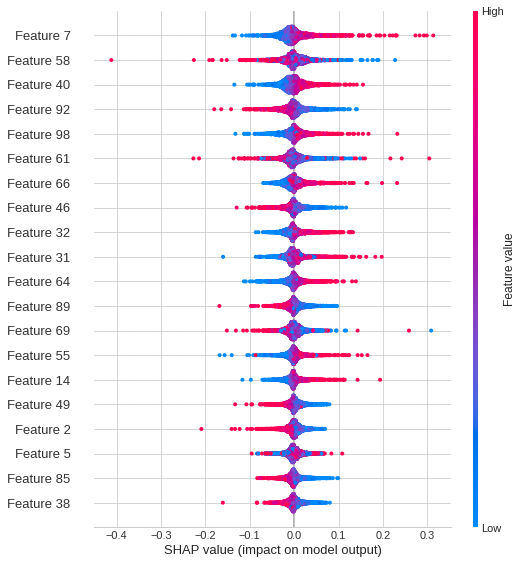

Drama


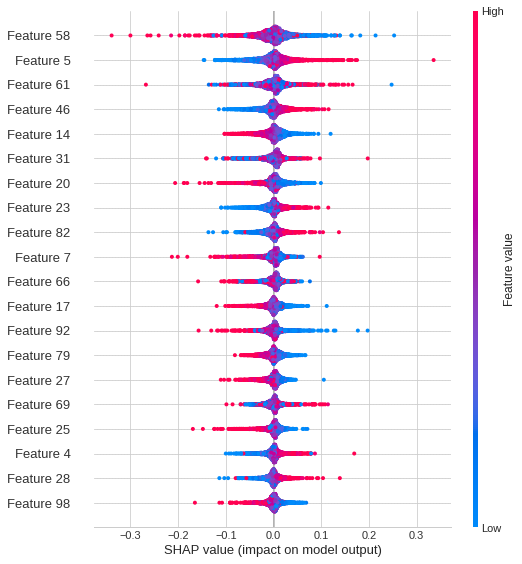

Horror


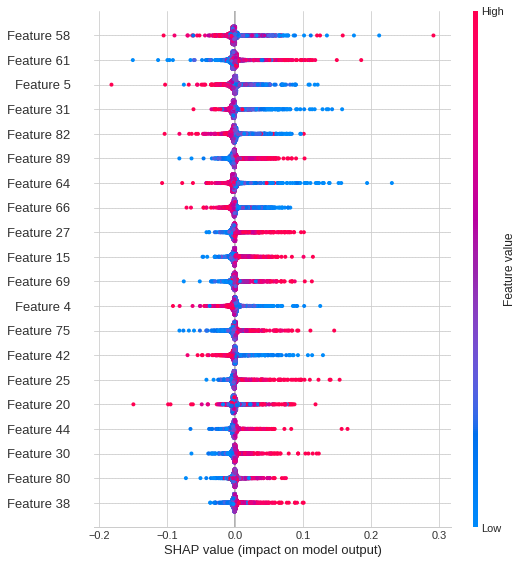

Kids and Family


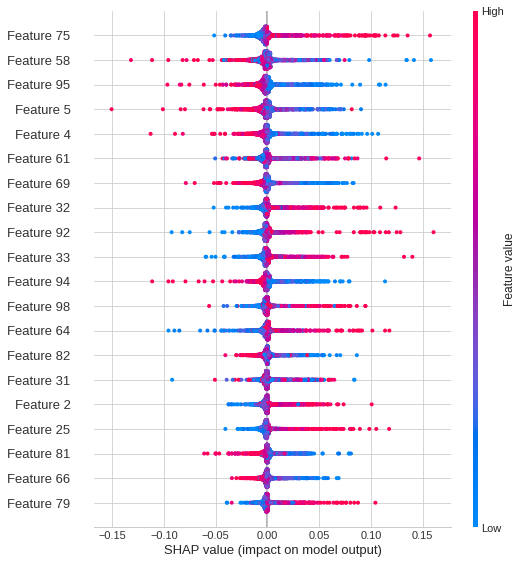

Musical and Performing Arts


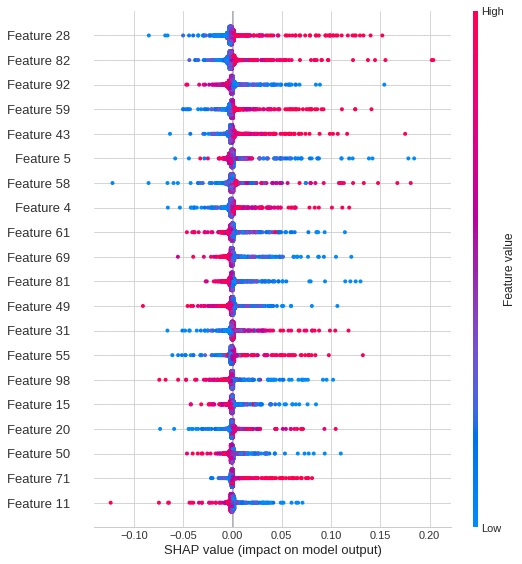

Mystery and Suspense


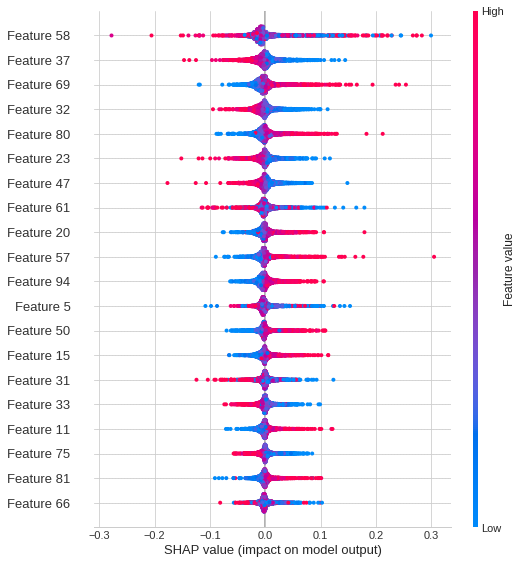

Romance


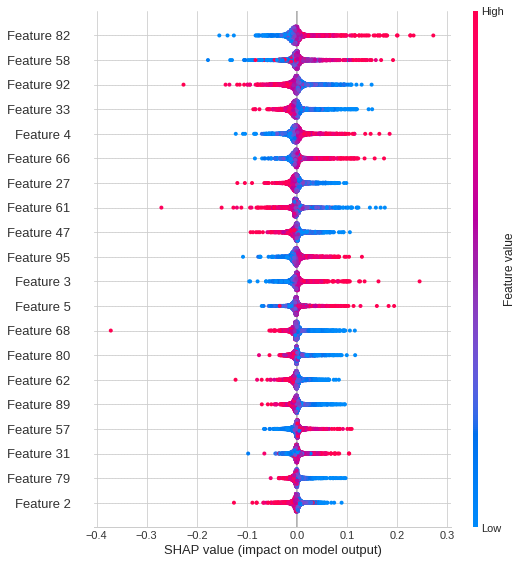

Science Fiction and Fantasy


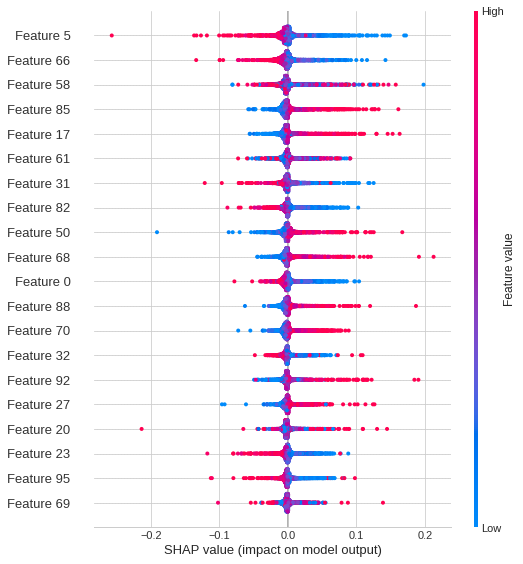

Other


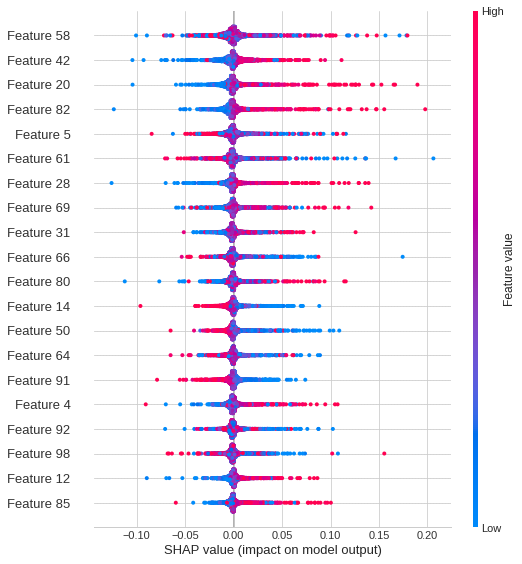

In [37]:
for i in range(12):
    print(y_df.columns[i])
    shap.summary_plot(shap_vals[i], test_matrix[:num_explanations])

In [38]:
shap_vals_arr = np.array(shap_vals)
shap_vals_arr.shape

(12, 3000, 100)

average by $m$ to get the global feature importances

In [39]:
shap_vals_global = shap_vals_arr.mean(axis=1)
shap_vals_global.shape

(12, 100)

In [40]:
test_voc = []
for x in X_test[:num_explanations]:
    test_voc.extend(x)
    
test_voc = list(set(test_voc))
len(test_voc)

8885

In [41]:
test_embedding_matrix = embedding_matrix_pos[test_voc]
test_embedding_matrix.shape

(8885, 100)

In [42]:
shap_class_word = np.dot(shap_vals_global, test_embedding_matrix.T)
shap_class_word.shape

(12, 8885)

In [43]:
idx = np.argpartition(shap_class_word[0], -10)[-10:]
sorted_idx = idx[np.argsort(shap_class_word[0][idx])]

word_lookup = {v:k for k,v in tokenizer.word_index.items()}

for i in sorted_idx:
    print(word_lookup[i])

endeavour
visual
restaurateur
satisfying
expert
herean
scarc
slay
feature
heartstr


In [44]:
word_lookup = {v:k for k,v in tokenizer.word_index.items()}

for i in range(len(tags)):
    print(tags[i])
    print('\n')
    idx = np.argpartition(shap_class_word[i], -20)[-20:]
    sorted_idx = idx[np.argsort(shap_class_word[i][idx])]

    

    for j in sorted_idx:
        print(word_lookup[j])
        
    #break
    print('\n')

Action and Adventure


debt
domest
chicken
understand
audi
strive
muscl
opportun
mate
sensitive
endeavour
visual
restaurateur
satisfying
expert
herean
scarc
slay
feature
heartstr


Animation


aftertast
museum
prosthet
audi
culture
bas
radiat
dive
headline
heartstr
picket
hospit
futuristic
buck
incap
onetime
troubled
rabbi
photograph
satisfactory


Art House and International


regim
risen
loath
frighten
throughout
treacly
recogniz
dern
picket
gossip
personal
leap
cheeki
tooth
creep
art
hallucin
religion
obnoxi
visitor


Comedy


im
movement
quantity
cohes
brick
american
fault
heighten
guilt
overkil
motley
kooky
pervers
polici
discount
shorter
shadow
embodi
politically
ravish


Drama


retriev
wet
lively
housekeep
rudimentary
heard
stor
condescend
fist
scale
witty
incid
tooth
saccharin
free
hallucin
flash
trivia
funky
art


Horror


wat
term
powers
amaz
persecut
negative
existential
penniless
thrilling
shorthand
exuber
manic
scarc
cerebr
soggi
sure
military
howl
worthy
aftertast


Kids

## comedydramafresh

In [47]:
cdr = tokenizer.texts_to_sequences(comedydramarotten)
type(cdr)

list

In [48]:
cdf = tokenizer.texts_to_sequences(comedydramafresh)
cd = cdf + cdr
cd_emb = globe_emb(cd)

cd_emb.shape

(779, 100)

In [49]:

attrib_data = train_matrix[:15000]
explainer = shap.DeepExplainer(model, attrib_data)
# num_explanations = 3000
shap_vals_cdf = explainer.shap_values(cdf_emb)

# shap.summary_plot(shap_vals, class_names=tags)

In [50]:
shap_vals_cdf = np.array(shap_vals_cdf).mean(axis=1)
shap_vals_cdf.shape

(12, 100)

In [53]:
cdf_voc = []
for x in cd:
    cdf_voc.extend(x)
    
cdf_voc = list(set(cdf_voc))
len(cdf_voc)

3564

In [54]:
cdf_embedding_matrix = embedding_matrix_pos[cdf_voc]
cdf_embedding_matrix.shape

(3564, 100)

In [55]:
shap_class_cdf = np.dot(shap_vals_cdf, cdf_embedding_matrix.T)
shap_class_cdf.shape

(12, 3564)

In [56]:
word_lookup = {v:k for k,v in tokenizer.word_index.items()}

for i in range(len(tags)):
    print(tags[i])
    print('\n')
    idx = np.argpartition(shap_class_cdf[i], -20)[-20:]
    sorted_idx = idx[np.argsort(shap_class_cdf[i][idx])]

    

    for j in sorted_idx:
        print(word_lookup[j])
        
    #break
    print('\n')

Action and Adventure


rugby
solid
oper
cas
vac
franchis
potential
led
sleep
leader
reality
light
suprem
avid
bone
devil
actress
eclips
commando
drive


Animation


late
commando
rugby
potential
reality
assault
fanci
light
stalk
newspap
scandal
newfound
somewhat
cun
aspir
avid
step
drive
matt
eclips


Art House and International


dazed
era
beauty
responsibility
finger
occur
frighten
pace
gambler
martial
stuff
ago
reach
unhappi
villag
hilari
viewer
vengeanc
danc
energi


Comedy


beauty
terrorist
invent
boss
keep
presenc
small
custom
switch
reinvent
viewer
best
approach
energi
gambler
hilari
danc
unhappi
villag
consequ


Drama


reach
vengeanc
mysterious
custom
reinvent
presenc
gambler
gifted
strang
best
martial
invent
beauty
hilari
viewer
consequ
unhappi
energi
villag
danc


Horror


actress
suprem
skill
led
bone
franchis
unfortun
valet
department
matt
newspap
assault
light
rugby
drive
grow
freewheeling
desolate
eclips
step


Kids and Family


newfound
cun
actress
oper
somewhat
step
i

## drama

In [57]:
df = tokenizer.texts_to_sequences(dramafresh)
dr = tokenizer.texts_to_sequences(dramarotten)
df_emb = globe_emb(df+dr)

df_emb.shape

(955, 100)

In [58]:
attrib_data = train_matrix[:15000]
explainer = shap.DeepExplainer(model, attrib_data)
# num_explanations = 3000
shap_vals_df = explainer.shap_values(df_emb)

In [59]:
shap_vals_df = np.array(shap_vals_df).mean(axis=1)
shap_vals_df.shape


(12, 100)

In [60]:
df_voc = []
for x in (df+dr):
    df_voc.extend(x)
    
df_voc = list(set(df_voc))
len(df_voc)

4257

In [61]:
df_embedding_matrix = embedding_matrix_pos[df_voc]
df_embedding_matrix.shape

(4257, 100)

In [62]:
shap_class_df = np.dot(shap_vals_df, df_embedding_matrix.T)
shap_class_df.shape

(12, 4257)

In [63]:
word_lookup = {v:k for k,v in tokenizer.word_index.items()}

for i in range(len(tags)):
    print(tags[i])
    print('\n')
    idx = np.argpartition(shap_class_df[i], -20)[-20:]
    sorted_idx = idx[np.argsort(shap_class_df[i][idx])]

    

    for j in sorted_idx:
        print(word_lookup[j])
        
    #break
    print('\n')

Action and Adventure


golden
stripped
improv
necessarili
country
android
evolut
subsist
rider
string
mine
undercurr
paradox
rocket
rival
empir
photographi
shipmat
shape
significant


Animation


tough
golden
overrun
asleep
ladi
compar
sk
lush
empir
partn
sens
stripped
photographi
shape
shipmat
subsist
helm
necessarili
rocket
significant


Art House and International


reincarn
theme
scream
wast
similar
complet
significant
alien
outskirt
water
trail
mere
magician
youngster
rider
undercov
appl
faith
notic
share


Comedy


load
paradox
alien
rival
defi
faith
share
vampire
empir
alive
mere
desper
exploit
theme
significant
partn
devastating
host
shape
shipmat


Drama


object
tribesman
narrat
car
military
movie
psychologist
film
around
internet
plant
chief
legendari
imag
visual
everyday
soar
fashion
reach
cinematic


Horror


complet
truth
prop
mount
reign
piecec
empir
alien
milestone
shape
ladi
nostalgic
glitch
necessarili
theyr
mere
sens
shipmat
rocket
significant


Kids and Family


par

## comedy

In [64]:
cf = tokenizer.texts_to_sequences(comedyfresh)
cr = tokenizer.texts_to_sequences(comedyrotten)
cf_emb = globe_emb(cf+cr)

cf_emb.shape

(830, 100)

In [65]:
attrib_data = train_matrix[:15000]
explainer = shap.DeepExplainer(model, attrib_data)
# num_explanations = 3000
shap_vals_cf = explainer.shap_values(cf_emb)

In [66]:
shap_vals_cf = np.array(shap_vals_cf).mean(axis=1)
shap_vals_cf.shape

(12, 100)

In [67]:
cf_voc = []
for x in (cf+cr):
    cf_voc.extend(x)
    
cf_voc = list(set(cf_voc))
len(cf_voc)

3544

In [68]:
cf_embedding_matrix = embedding_matrix_pos[cf_voc]
cf_embedding_matrix.shape

(3544, 100)

In [69]:
shap_class_cf = np.dot(shap_vals_cf, cf_embedding_matrix.T)
shap_class_cf.shape

(12, 3544)

In [70]:
word_lookup = {v:k for k,v in tokenizer.word_index.items()}

for i in range(len(tags)):
    print(tags[i])
    print('\n')
    idx = np.argpartition(shap_class_cf[i], -20)[-20:]
    sorted_idx = idx[np.argsort(shap_class_cf[i][idx])]

    

    for j in sorted_idx:
        print(word_lookup[j])
        
    #break
    print('\n')

Action and Adventure


accomplish
amus
gooder
desir
incredible
lie
slacker
amidst
rider
base
crazi
lin
mort
consult
simpl
deepen
leg
manor
centric
pop


Animation


addict
memori
leg
resembl
modern
dance
crazi
architectur
b
somehow
consult
security
mission
prank
deepen
centric
collaps
simpl
spend
attorney


Art House and International


sel
inspirational
somehow
mort
prospect
sophist
resembl
deepen
serial
disheartening
perpetual
humor
detail
cold
leg
considerable
centric
simpl
prank
delight


Comedy


mysterious
recommend
motel
summit
coming
els
conception
hilari
arrest
car
pickup
prison
sentiment
wake
liter
constant
he
baseball
draw
disillus


Drama


somehow
serial
foil
mort
script
invest
inspirational
detail
b
resembl
modern
simpl
divid
sophist
disheartening
leg
prank
cold
centric
considerable


Horror


sensit
energy
lie
modern
descend
essenti
sel
crude
smart
maven
distinct
spin
ocean
b
simpl
delight
circus
divid
spend
centric


Kids and Family


mission
b
security
icon
memori
free